In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
data_raw = pd.read_csv('C:\\Users\\maryj\\Desktop\\RM\\NLP\\dataset_new\\booksummaries\\booksummariesdataset.csv')
data_raw.shape

(12049, 14)

In [4]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 12049
Number of columns in data = 14




**Sample data:**

,Title,Author/Publisher,Summary,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9,Genre10,Genre11
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca...",Roman,Satire,Children's literature,Speculative fiction,Fiction,NaN,NaN,NaN,NaN,NaN,NaN
1,A Clockwork Orange,Anthony Burgess,"Alex, a teenager living in near-future Englan...",Science Fiction,Novella,Speculative fiction,Utopian and dystopian fiction,Satire,Fiction,NaN,NaN,NaN,NaN,NaN
2,The Plague,Albert Camus,The text of The Plague is divided into five p...,Existentialism,Fiction,Absurdist fiction,Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A Fire Upon the Deep,Vernor Vinge,The novel posits that space around the Milky ...,Hard science fiction,Science Fiction,Speculative fiction,Fantasy,Fiction,NaN,NaN,NaN,NaN,NaN,NaN
4,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul BÃ¤umer, a G...",War novel,Roman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for i in range(1,12):
    a='Genre'+str(i)
    data_raw[a] = data_raw[a].fillna(value="") #replacing the Genre NaN values with empty strings

In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

Title               0
Author/Publisher    0
Summary             0
Genre1              0
Genre2              0
Genre3              0
Genre4              0
Genre5              0
Genre6              0
Genre7              0
Genre8              0
Genre9              0
Genre10             0
Genre11             0
dtype: int64


In [7]:
data=data_raw

In [8]:
#IMPORTANT !!!

#Steps from here are required only if doing for few genres

In [9]:
#to identify unique genres
#step 1: club genres from all over into 1 list
o=[]
for i in range(1,12):
    a='Genre'+str(i)
    n= data[a].unique()
    n= n.tolist()
    o= o+n

#output list stored in o

#step 2: find unique elements in list
out=np.array(o)
out=np.unique(out)
out=out.tolist()

#total number of genres
print(len(out))
#print the list of unique genres
print(out)



222
['', ' Absurdist fiction', ' Adventure', ' Adventure novel', ' Albino bias', ' Alien invasion', ' Alternate history', ' American Gothic Fiction', ' Anthology', ' Anthropology', ' Anti-nuclear', ' Anti-war', ' Apocalyptic and post-apocalyptic fiction', ' Autobiographical novel', ' Autobiography', ' Bangsian fantasy', ' Bildungsroman', ' Biographical novel', ' Biography', ' Biopunk', ' Bit Lit', ' Black comedy', " Boys' school stories", ' Business', ' Cabal', ' Campus novel', ' Catastrophic literature', ' Chick lit', " Children's literature", ' Chivalric romance', ' Collage', ' Colonial United States romance', ' Comedy', ' Comedy of manners', ' Comic book', ' Comic fantasy', ' Comic novel', ' Comic science fiction', ' Comics', ' Coming of age', ' Computer Science', ' Conspiracy', ' Conspiracy fiction', ' Contemporary fantasy', ' Cookbook', ' Cozy', ' Creative nonfiction', ' Crime Fiction', ' Cyberpunk', ' Dark fantasy', ' Detective fiction', ' Drama', ' Dying Earth subgenre', ' Dysto

In [10]:
out.pop(0) #Remove the first null value 

''

In [11]:
#to find number of records having that specific Genre
genre_count_list=[]
for i in out:
        seriesObj = data.apply(lambda x: True if i in list(x) else False, axis=1)
        numOfRows = len(seriesObj[seriesObj == True].index)
        genre_count_list.append(numOfRows)

In [12]:
len(genre_count_list) # rechecking length of the the count_list

221

In [13]:
#need to move backwards so as to get records that have the top 10 common genres

In [14]:
#Step 1: finding the unique counts of records(count is the number of records each genre occurs.)
#this is done to find the top 'n' Genres that occur in the topmost number of records. That is, to play around with just n genres.
nout=np.array(genre_count_list)
nout=np.unique(nout)#unique list will be in sorted by np.unique() function
nout=nout.tolist()
noutrev=nout[::-1] #get sorted lsit in descending order or in simple words to reverse this string

#Extracting the top 'n' highest number of records.
#Here, n = 10
k=[]
for i in range(0,10):
    k.append(noutrev[i])
    
print(k)

[4712, 4291, 2724, 2377, 2321, 1999, 1358, 761, 736, 732]


In [15]:
#Step 2: getting the respective genres that have the above number of records with them.
top_5=[]
for i in range(len(genre_count_list)):
    a=genre_count_list[i]
    if a in k:
        top_5.append(out[i])
        
print(top_5)

[" Children's literature", ' Crime Fiction', ' Fantasy', ' Fiction', ' Mystery', ' Novel', ' Science Fiction', ' Speculative fiction', ' Suspense', ' Young adult literature']


In [16]:
data=data_raw
print(len(data))
data

12049


,Title,Author/Publisher,Summary,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9,Genre10,Genre11
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca...",Roman,Satire,Children's literature,Speculative fiction,Fiction,,,,,,
1,A Clockwork Orange,Anthony Burgess,"Alex, a teenager living in near-future Englan...",Science Fiction,Novella,Speculative fiction,Utopian and dystopian fiction,Satire,Fiction,,,,,
2,The Plague,Albert Camus,The text of The Plague is divided into five p...,Existentialism,Fiction,Absurdist fiction,Novel,,,,,,,
3,A Fire Upon the Deep,Vernor Vinge,The novel posits that space around the Milky ...,Hard science fiction,Science Fiction,Speculative fiction,Fantasy,Fiction,,,,,,
4,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul BÃ¤umer, a G...",War novel,Roman,,,,,,,,,
5,A Wizard of Earthsea,Ursula K. Le Guin,"Ged is a young boy on Gont, one of the larger...",Children's literature,Fantasy,Speculative fiction,Bildungsroman,Fiction,,,,,,
6,Blade Runner 3: Replicant Night,K. W. Jeter,"Living on Mars, Deckard is acting as a consul...",Science Fiction,Speculative fiction,,,,,,,,,
7,Blade Runner 2: The Edge of Human,K. W. Jeter,Beginning several months after the events in ...,Science Fiction,Speculative fiction,,,,,,,,,
8,Crash,J. G. Ballard,The story is told through the eyes of narrato...,Speculative fiction,Fiction,Novel,,,,,,,,
9,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,


In [17]:
rep_indices=[] # to store the indices that we don't need under the condition that there are no genres (contd)
#from the top_10 list or that the number of genres from the top_10 list are comparetively smaller (contd.)
#than the total number of genres for a particular record.
multiLabel_counts = [] # to store the multilableCount of each row. IMP! will be required further
for i in range(len(data)):
    c=0;
    multiLabelCount=0;
    for j in range(1,12):
        multiLabelCount=multiLabelCount+1 #total number of labels for that record
        a='Genre'+str(j)
        loc=data.columns.get_loc(a)
        ele= data.iloc[i,loc]
        if ele=='':
            break
        if ele in top_5:
            c=c+1 #number of genres from the top_5list
        multiLabel_counts.append(multiLabelCount)
    #multiLabelCount=np.floor(multiLabelCount/2) #converting to floor integer
    if c==0 or c<multiLabelCount-1:
        rep_indices.append(i)

#dropping the not needed rows        
for i in range(len(rep_indices)):
        data=data.drop(rep_indices[i],axis=0)
                   
data

,Title,Author/Publisher,Summary,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9,Genre10,Genre11
6,Blade Runner 3: Replicant Night,K. W. Jeter,"Living on Mars, Deckard is acting as a consul...",Science Fiction,Speculative fiction,,,,,,,,,
7,Blade Runner 2: The Edge of Human,K. W. Jeter,Beginning several months after the events in ...,Science Fiction,Speculative fiction,,,,,,,,,
8,Crash,J. G. Ballard,The story is told through the eyes of narrato...,Speculative fiction,Fiction,Novel,,,,,,,,
9,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,
11,Chapterhouse Dune,Frank Herbert,The situation is desperate for the Bene Gesse...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,
13,The Cider House Rules,John Irving,Homer Wells grows up in an orphanage where he...,Fiction,,,,,,,,,,
16,Dune Messiah,Frank Herbert,Twelve years after the events described in Du...,Science Fiction,Speculative fiction,Children's literature,Fiction,Novel,,,,,,
18,Death of a Hero,Richard Aldington,Death of a Hero is the story of a young Engli...,Fiction,,,,,,,,,,
21,Farmer Giles of Ham,J. R. R. Tolkien,Farmer Giles (Ã†gidius Ahenobarbus Julius Agr...,Fantasy,Fiction,,,,,,,,,
23,God Emperor of Dune,Frank Herbert,The seemingly immortal God Emperor Leto II ha...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,


In [18]:
print(len(data))
data

6934


,Title,Author/Publisher,Summary,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9,Genre10,Genre11
6,Blade Runner 3: Replicant Night,K. W. Jeter,"Living on Mars, Deckard is acting as a consul...",Science Fiction,Speculative fiction,,,,,,,,,
7,Blade Runner 2: The Edge of Human,K. W. Jeter,Beginning several months after the events in ...,Science Fiction,Speculative fiction,,,,,,,,,
8,Crash,J. G. Ballard,The story is told through the eyes of narrato...,Speculative fiction,Fiction,Novel,,,,,,,,
9,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,
11,Chapterhouse Dune,Frank Herbert,The situation is desperate for the Bene Gesse...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,
13,The Cider House Rules,John Irving,Homer Wells grows up in an orphanage where he...,Fiction,,,,,,,,,,
16,Dune Messiah,Frank Herbert,Twelve years after the events described in Du...,Science Fiction,Speculative fiction,Children's literature,Fiction,Novel,,,,,,
18,Death of a Hero,Richard Aldington,Death of a Hero is the story of a young Engli...,Fiction,,,,,,,,,,
21,Farmer Giles of Ham,J. R. R. Tolkien,Farmer Giles (Ã†gidius Ahenobarbus Julius Agr...,Fantasy,Fiction,,,,,,,,,
23,God Emperor of Dune,Frank Herbert,The seemingly immortal God Emperor Leto II ha...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,


In [19]:
#for 1-10-2020
#need to add these 11 Genres as Columns, and write a code to add 0,1 to respective if yes or no.
#suggest to concatenate Genre1, Genre2.... Genre11 into one column and use (contd)
#.....pd.concat([df,df.Colors.str.get_dummies(sep=', ')],1)..... to get 0,1 coloumn.. can try this on new dataframe, data and dat_raw exists

In [20]:
#THE ABOVE WAS TRIED AND TESTED, SO proceeding to make BEING EDITED on dataset data

In [21]:
genres=['Genre1','Genre2','Genre3','Genre4','Genre5','Genre6','Genre7','Genre8','Genre9','Genre10','Genre11']

In [22]:
#Combine the 11 genre columns
data['GENRE']=data[genres[0]]+','+data[genres[1]]+','+data[genres[2]]+','+data[genres[3]]+','+data[genres[4]]+','+data[genres[5]]+','+data[genres[6]]+','+data[genres[7]]+','+data[genres[8]]+','+data[genres[9]]+','+data[genres[10]]
data

,Title,Author/Publisher,Summary,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9,Genre10,Genre11,GENRE
6,Blade Runner 3: Replicant Night,K. W. Jeter,"Living on Mars, Deckard is acting as a consul...",Science Fiction,Speculative fiction,,,,,,,,,,"Science Fiction, Speculative fiction,,,,,,,,,"
7,Blade Runner 2: The Edge of Human,K. W. Jeter,Beginning several months after the events in ...,Science Fiction,Speculative fiction,,,,,,,,,,"Science Fiction, Speculative fiction,,,,,,,,,"
8,Crash,J. G. Ballard,The story is told through the eyes of narrato...,Speculative fiction,Fiction,Novel,,,,,,,,,"Speculative fiction, Fiction, Novel,,,,,,,,"
9,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,,"Science Fiction, Speculative fiction, Childre..."
11,Chapterhouse Dune,Frank Herbert,The situation is desperate for the Bene Gesse...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,,"Science Fiction, Speculative fiction, Childre..."
13,The Cider House Rules,John Irving,Homer Wells grows up in an orphanage where he...,Fiction,,,,,,,,,,,"Fiction,,,,,,,,,,"
16,Dune Messiah,Frank Herbert,Twelve years after the events described in Du...,Science Fiction,Speculative fiction,Children's literature,Fiction,Novel,,,,,,,"Science Fiction, Speculative fiction, Childre..."
18,Death of a Hero,Richard Aldington,Death of a Hero is the story of a young Engli...,Fiction,,,,,,,,,,,"Fiction,,,,,,,,,,"
21,Farmer Giles of Ham,J. R. R. Tolkien,Farmer Giles (Ã†gidius Ahenobarbus Julius Agr...,Fantasy,Fiction,,,,,,,,,,"Fantasy, Fiction,,,,,,,,,"
23,God Emperor of Dune,Frank Herbert,The seemingly immortal God Emperor Leto II ha...,Science Fiction,Speculative fiction,Children's literature,Fiction,,,,,,,,"Science Fiction, Speculative fiction, Childre..."


In [23]:
#splitting based on the existing genres and dropping columns Genre1,Genre2,... Genre11 and combined column 'GENRE'
data=pd.concat([data,data.GENRE.str.get_dummies(sep=',')],1)
loc1=data.columns.get_loc('Genre1')
loc2=data.columns.get_loc('GENRE')
data=data.drop(data.columns[loc1:loc2+1],1)
data

,Title,Author/Publisher,Summary,Children's literature,Crime Fiction,Fantasy,Fiction,Mystery,Novel,Science Fiction,Speculative fiction,Suspense,Young adult literature
6,Blade Runner 3: Replicant Night,K. W. Jeter,"Living on Mars, Deckard is acting as a consul...",0,0,0,0,0,0,1,1,0,0
7,Blade Runner 2: The Edge of Human,K. W. Jeter,Beginning several months after the events in ...,0,0,0,0,0,0,1,1,0,0
8,Crash,J. G. Ballard,The story is told through the eyes of narrato...,0,0,0,1,0,1,0,1,0,0
9,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,1,0,0,1,0,0,1,1,0,0
11,Chapterhouse Dune,Frank Herbert,The situation is desperate for the Bene Gesse...,1,0,0,1,0,0,1,1,0,0
13,The Cider House Rules,John Irving,Homer Wells grows up in an orphanage where he...,0,0,0,1,0,0,0,0,0,0
16,Dune Messiah,Frank Herbert,Twelve years after the events described in Du...,1,0,0,1,0,1,1,1,0,0
18,Death of a Hero,Richard Aldington,Death of a Hero is the story of a young Engli...,0,0,0,1,0,0,0,0,0,0
21,Farmer Giles of Ham,J. R. R. Tolkien,Farmer Giles (Ã†gidius Ahenobarbus Julius Agr...,0,0,1,1,0,0,0,0,0,0
23,God Emperor of Dune,Frank Herbert,The seemingly immortal God Emperor Leto II ha...,1,0,0,1,0,0,1,1,0,0


In [24]:
# IMPORTANT !!!

#steps till here are required only if continuing with 10 Genres. Free to increase or decrease number of Genres

# codes related to the same should come above this cell

In [25]:
data.shape[1]

13

In [26]:
loc1=data.columns.get_loc('Summary')
di=data.columns[loc1+1:]
print(di)
for i in di:
    if i not in top_5:
        data=data.drop(i,1)

Index([' Children's literature', ' Crime Fiction', ' Fantasy', ' Fiction',
       ' Mystery', ' Novel', ' Science Fiction', ' Speculative fiction',
       ' Suspense', ' Young adult literature'],
      dtype='object')


In [27]:
print(data.head())
print(data.shape)

                                Title Author/Publisher  \
6     Blade Runner 3: Replicant Night      K. W. Jeter   
7   Blade Runner 2: The Edge of Human      K. W. Jeter   
8                               Crash    J. G. Ballard   
9                    Children of Dune    Frank Herbert   
11                  Chapterhouse Dune    Frank Herbert   

                                              Summary   Children's literature  \
6    Living on Mars, Deckard is acting as a consul...                       0   
7    Beginning several months after the events in ...                       0   
8    The story is told through the eyes of narrato...                       0   
9    Nine years after Emperor Paul Muad'dib walked...                       1   
11   The situation is desperate for the Bene Gesse...                       1   

     Crime Fiction   Fantasy   Fiction   Mystery   Novel   Science Fiction  \
6                0         0         0         0       0                 1   
7       

In [32]:
data.to_csv(r'C:\\Users\\maryj\\Desktop\\RM\\NLP\\dataset_new\\booksummaries\\mainediteddatasettt.csv', index = False)

In [29]:
print("The dimension of the dataset is ",data.shape)
data.head(3)

The dimension of the dataset is  (6934, 13)


,Title,Author/Publisher,Summary,Children's literature,Crime Fiction,Fantasy,Fiction,Mystery,Novel,Science Fiction,Speculative fiction,Suspense,Young adult literature
6,Blade Runner 3: Replicant Night,K. W. Jeter,"Living on Mars, Deckard is acting as a consul...",0,0,0,0,0,0,1,1,0,0
7,Blade Runner 2: The Edge of Human,K. W. Jeter,Beginning several months after the events in ...,0,0,0,0,0,0,1,1,0,0
8,Crash,J. G. Ballard,The story is told through the eyes of narrato...,0,0,0,1,0,1,0,1,0,0


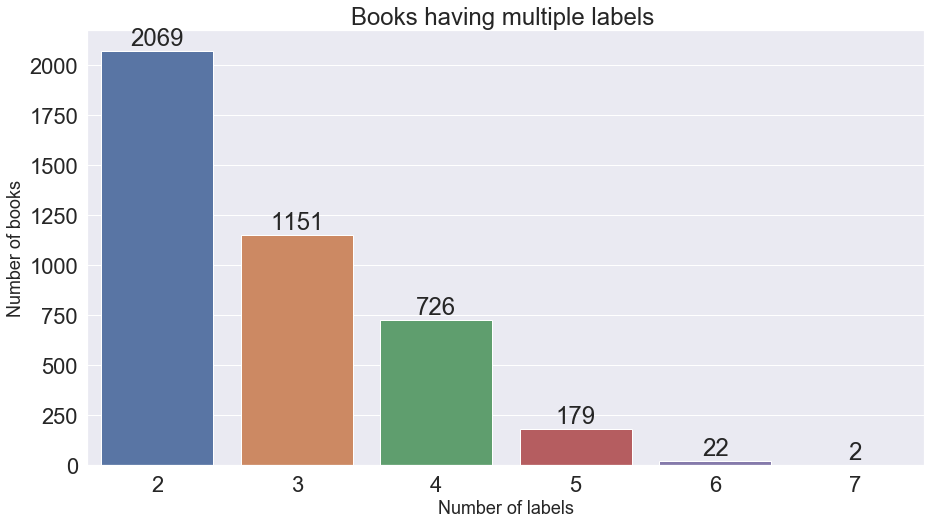

In [30]:
rowSums = data.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Books having multiple labels ")
plt.ylabel('Number of books', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [31]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(300,150))

#generating word cloud for all genres. This need to be done individualy for all ten genres because in for loop, not working

#genre-wise word cloud
for i in range(0,len(top_10)):
    a=top_10[i]
    subset = data[data[a] ==1]
    text = subset.Summary.values
    cloud = WordCloud(
                              stopwords=STOPWORDS,
                              background_color='black',
                              collocations=False,
                              width=2500,
                              height=1800
                             ).generate(" ".join(text))

    plt.subplot(4, 3, i+1)
    plt.axis('off')
    plt.title(a,fontsize=40)
    plt.imshow(cloud)

plt.show()

NameError: name 'top_10' is not defined

<Figure size 21600x10800 with 0 Axes>

In [ ]:
data

In [ ]:
data = data.loc[np.random.choice(data.index, size=4000)]
data.shape

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
def cleanbasic(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [32]:
data['Summary'] = data['Summary'].str.lower()
data['Summary'] = data['Summary'].apply(cleanbasic)
data['Summary'] = data['Summary'].apply(cleanPunc)
data['Summary'] = data['Summary'].apply(keepAlpha)
data.head()

,Title,Author/Publisher,Summary,Children's literature,Crime Fiction,Fantasy,Fiction,Mystery,Novel,Science Fiction,Speculative fiction,Suspense,Young adult literature
10912,The Rehearsal,Eleanor Catton,in the aftermath of a local scandal involving ...,0,0,0,0,0,1,0,0,0,0
11918,Infinity Blade: Awakening,Brandon Sanderson,the story picks up from the main ending of inf...,0,0,1,0,0,0,0,0,0,0
4295,Make Death Love Me,Ruth Rendell,bank manager alan groombridge is bored with hi...,0,1,0,1,1,0,0,0,1,0
11199,The Adventures of Philip,William Makepeace Thackeray,philip firmin son of dr brand firmin and of lo...,0,0,0,0,0,1,0,0,0,0
8099,Homo faber,Max Frisch,during the s walter faber who works at the sw...,0,0,0,0,0,1,0,0,0,0


In [33]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Summary'] = data['Summary'].apply(removeStopWords)
data.head()

,Title,Author/Publisher,Summary,Children's literature,Crime Fiction,Fantasy,Fiction,Mystery,Novel,Science Fiction,Speculative fiction,Suspense,Young adult literature
10912,The Rehearsal,Eleanor Catton,aftermath local scandal involving young f...,0,0,0,0,0,1,0,0,0,0
11918,Infinity Blade: Awakening,Brandon Sanderson,story picks main ending infinity blade si...,0,0,1,0,0,0,0,0,0,0
4295,Make Death Love Me,Ruth Rendell,bank manager alan groombridge bored tedious...,0,1,0,1,1,0,0,0,1,0
11199,The Adventures of Philip,William Makepeace Thackeray,philip firmin son dr brand firmin lord ring...,0,0,0,0,0,1,0,0,0,0
8099,Homo faber,Max Frisch,walter faber works swiss federal instit...,0,0,0,0,0,1,0,0,0,0


In [34]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Summary'] = data['Summary'].apply(stemming)
data.head()

,Title,Author/Publisher,Summary,Children's literature,Crime Fiction,Fantasy,Fiction,Mystery,Novel,Science Fiction,Speculative fiction,Suspense,Young adult literature
10912,The Rehearsal,Eleanor Catton,aftermath local scandal involv young femal stu...,0,0,0,0,0,1,0,0,0,0
11918,Infinity Blade: Awakening,Brandon Sanderson,stori pick main end infin blade siri final pla...,0,0,1,0,0,0,0,0,0,0
4295,Make Death Love Me,Ruth Rendell,bank manag alan groombridg bore tedious career...,0,1,0,1,1,0,0,0,1,0
11199,The Adventures of Philip,William Makepeace Thackeray,philip firmin son dr brand firmin lord ringwoo...,0,0,0,0,0,1,0,0,0,0
8099,Homo faber,Max Frisch,walter faber work swiss feder institut technol...,0,0,0,0,0,1,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(2800, 13)
(1200, 13)


In [36]:
train_text = train['Summary']
test_text = test['Summary']

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [39]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Title','Author/Publisher','Summary'], axis=1)
y_train = y_train.apply(pd.to_numeric,errors='ignore')

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Title','Author/Publisher','Summary'], axis=1)
y_test = y_test.apply(pd.to_numeric,errors='ignore')

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [195]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in top_10:
    printmd('**Processing {} Summaries...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing  Children's literature Summaries...**

Test accuracy is 0.8227777777777778




**Processing  Crime Fiction Summaries...**

Test accuracy is 0.93




**Processing  Fantasy Summaries...**

Test accuracy is 0.8105555555555556




**Processing  Fiction Summaries...**

Test accuracy is 0.7577777777777778




**Processing  Mystery Summaries...**

Test accuracy is 0.9116666666666666




**Processing  Novel Summaries...**

Test accuracy is 0.7966666666666666




**Processing  Science Fiction Summaries...**

Test accuracy is 0.8316666666666667




**Processing  Speculative fiction Summaries...**

Test accuracy is 0.7811111111111111




**Processing  Suspense Summaries...**

Test accuracy is 0.9505555555555556




**Processing  Young adult literature Summaries...**

Test accuracy is 0.92


Wall time: 45.6 s


In [38]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

MemoryError: 

In [41]:

# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")